In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data_train = pd.read_csv('train.csv') #pandas以DataFrame的格式读入excel表
data_train1 = pd.read_csv('train.csv')
data_valid = pd.read_csv('valid.csv')
data_test2 = pd.read_csv('test.csv')
modelfile = 'modelweight.model' #神经网络权重保存

In [3]:
feature_dummy = list(pd.get_dummies(data_train).columns[1:].drop('price'))
feature = ['carat','depth','table','x','y','z']
label = ['price']
data_train_mean = data_train[feature + label].mean()
data_train_std = data_train[feature + label].std()

In [4]:
train_standard_dummy = pd.get_dummies(pd.read_excel('train_standard_d.xlsx'))

In [5]:
#2 数据预处理和标注-2
train_x = train_standard_dummy[feature + feature_dummy].as_matrix()
train_y = train_standard_dummy[label].as_matrix()

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
data_test2.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,4015,1.02,Premium,E,I1,60.4,62.0,3519,6.52,6.47,3.92
1,39212,0.52,Ideal,H,SI2,61.0,55.0,1065,5.22,5.19,3.18
2,10234,1.19,Premium,I,SI2,62.6,58.0,4745,6.75,6.70,4.21
3,19949,1.66,Good,J,VS2,64.4,54.0,8496,7.45,7.54,4.83
4,26801,1.52,Very Good,F,VS1,63.4,60.0,16670,7.30,7.25,4.61


In [7]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

## 一層隱藏層，使用 5, 10, 20 個神經元

In [8]:
 #3 建立一个简单BP神经网络模型
data_train_mean_f = data_train1[feature].mean()
data_train_std_f = data_train1[feature].std()
hidden_layer = [5, 10, 20]
n_epoch = 100
scores2 = []
rmse_test = []
R_square = []

for k in (feature):
    for j in range(0, len(data_test2)):
        data_test2.loc[j,[k]] = (data_test2.loc[j,[k]] - data_train_mean_f[k])/data_train_std_f[k] #数据标准化       
    data_test_standard_dummy2 = pd.get_dummies(data_test2)

    
for i in range(0,3):
    # 建模
    model = Sequential()  #层次模型
    model.add(Dense(hidden_layer[i], input_dim = len(feature + feature_dummy), init = 'uniform')) #输入层，Dense表示BP层
    model.add(Activation('sigmoid'))  #添加激活函数
    model.add(Dense(units = len(label), input_dim = hidden_layer[i]))  #输出层
    model.compile(loss = 'mean_squared_error', optimizer = 'adam') #编译模型
    model.fit(train_x, train_y, nb_epoch = n_epoch, batch_size = int(len(data_train)/n_epoch)+1) #训练模型 n_epoch 次
    model.save_weights(modelfile) #保存模型权重
    print(model.summary())
    
    # 結果寫入 data_test2
    test_x = (data_test_standard_dummy2[feature + feature_dummy]).as_matrix()
    data_test2[u'price_pred_test_{}'.format(hidden_layer[i])] = model.predict(test_x) * data_train1['price'].std() + data_train1['price'].mean()
    
    # 算 score 與 RMSE
    scores2.append(model.evaluate(test_x, data_test2['price_pred_test_{}'.format(hidden_layer[i])]))
    rmse_test.append(rmse(data_test2['price_pred_test_{}'.format(hidden_layer[i])],data_test2['price']))
    
    #算 R平方
    SST_test = []
    SSR_test = []
    for l in range(0,len(data_test2)):
        SST_test.append((data_test2.loc[l, ['price']] - data_test2[label].mean())**2)
        SSR_test.append((data_test2.iloc[l,11+i] - data_test2[label].mean())**2)
    sst_test = sum(SST_test)
    ssr_test = sum(SSR_test)
    R_square.append(ssr_test[0] / sst_test[0])

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, input_dim=32, kernel_initializer="uniform")`
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.





Epoch 1/100





32364/32364 [==============================] - 3s 87us/step - loss: 1.2186
Epoch 2/100
32364/32364 [==============================] - 2s 50us/step - loss: 0.4337
Epoch 3/100
32364/32364 [==============================] - 2s 57us/step - loss: 0.2465
Epoch 4/100
32364/32364 [==============================] - 2s 54us/step - loss: 0.1875
Epoch 5/100
32364/32364 [==============================] - 1s 44us/step - loss: 0.1617
Epoch 6/100
32364/32364 [==============================] - 1s 46us/step - loss: 0.1455
Epoch 7/100
32364/32364 [==============================] - 2s 56us/step - loss: 0.1326
Epoch 8/100
32364/32364 [==============================] - 2s 49us/step - loss: 0.1210
Epoch 9/100
32364/32364 [==============================] - 2s 48us/step - loss: 0.1104
Epoch 10/100
32364/32364 [==============================] - 1s 38us/step - loss: 0.1009
Epoch 11/100
32364/32364 [==============================] - 2s 57us/step - loss: 0.0924
Epoch 12/100
32364/32364 [=======

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


10788/10788 [==============================] - 0s 31us/step


C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=32, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 2s 60us/step - loss: 0.4840
Epoch 2/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.2098
Epoch 3/100
32364/32364 [==============================] - 1s 46us/step - loss: 0.1614
Epoch 4/100
32364/32364 [==============================] - 1s 24us/step - loss: 0.1339
Epoch 5/100
32364/32364 [==============================] - 1s 32us/step - loss: 0.1131
Epoch 6/100
32364/32364 [==============================] - 1s 26us/step - loss: 0.0964
Epoch 7/100
32364/32364 [==============================] - 1s 31us/step - loss: 0.0829
Epoch 8/100
32364/32364 [==============================] - 1s 24us/step - loss: 0.0720
Epoch 9/100
32364/32364 [==============================] - 1s 32us/step - loss: 0.0637
Epoch 10/100
32364/32364 [==============================] - 1s 35us/step - loss: 0.0574
Epoch 11/100
32364/32364 [==============================] - 2s 48us/step - loss: 0.0527
Epoch 12/100
32364/32364 [===============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, input_dim=32, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 2s 47us/step - loss: 0.5467
Epoch 2/100
32364/32364 [==============================] - 1s 37us/step - loss: 0.1929
Epoch 3/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.1488
Epoch 4/100
32364/32364 [==============================] - 1s 39us/step - loss: 0.1257
Epoch 5/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.1084
Epoch 6/100
32364/32364 [==============================] - 2s 50us/step - loss: 0.0934
Epoch 7/100
32364/32364 [==============================] - 1s 32us/step - loss: 0.0804
Epoch 8/100
32364/32364 [==============================] - 1s 25us/step - loss: 0.0698
Epoch 9/100
32364/32364 [==============================] - 1s 36us/step - loss: 0.0616
Epoch 10/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.0558: 1s - loss:
Epoch 11/100
32364/32364 [==============================] - 1s 43us/step - loss: 0.0517
Epoch 12/100
32364/32364 [===

# 4

In [117]:
scores2

[29714209.06637004, 29858356.237300705, 31287385.84204672]

In [118]:
rmse_test

[645.6230680438423, 602.2200020420576, 571.3285032633398]

In [119]:
R_square

[0.9350167451876727, 0.9330434207644541, 0.9934524797687742]

In [190]:
data_test2.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price_pred_test_5,price_pred_test_10,price_pred_test_20
0,4015,0.470324,Premium,E,I1,-0.936496,2.040756,3519,0.704045,0.633295,0.536049,2864.589355,2940.714844,3165.324219
1,39212,-0.586259,Ideal,H,SI2,-0.519242,-1.103130,1065,-0.454847,-0.469145,-0.502480,1078.144287,989.707764,1049.271484
2,10234,0.829562,Premium,I,SI2,0.593435,0.244250,4745,0.909080,0.831390,0.943040,4703.171387,4751.003418,4795.279297
3,19949,1.822749,Good,J,VS2,1.845196,-1.552257,8496,1.533098,1.554867,1.813159,8613.222656,8886.937500,8368.628906
4,26801,1.526906,Very Good,F,VS1,1.149773,1.142503,16670,1.399380,1.305095,1.504407,13896.980469,14584.346680,14829.718750


In [191]:
data_test2.to_excel('data_test2.xlsx')

In [20]:
data_test2 = pd.read_excel('data_test2.xlsx')

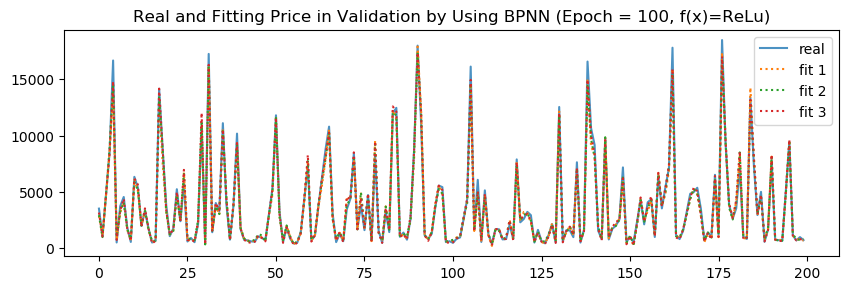

In [21]:
y1 = data_test2['price']
y2 = data_test2['price_pred_test_5']
y3 = data_test2['price_pred_test_10']
y4 = data_test2['price_pred_test_20']

# 設定圖片大小為長15、寬10
plt.figure(figsize=(10,3),dpi=100,linewidth = 2)
plt.title('Real and Fitting Price in Validation by Using BPNN (Epoch = 100, f(x)=ReLu)') 
plt.plot(y1[0:200],'-', alpha = 0.8, label='real')
plt.plot(y2[0:200],':', label='fit 1')
plt.plot(y3[0:200],':', label='fit 2')
plt.plot(y4[0:200],':', label='fit 3')
plt.legend(loc = 'upper right')
plt.show()

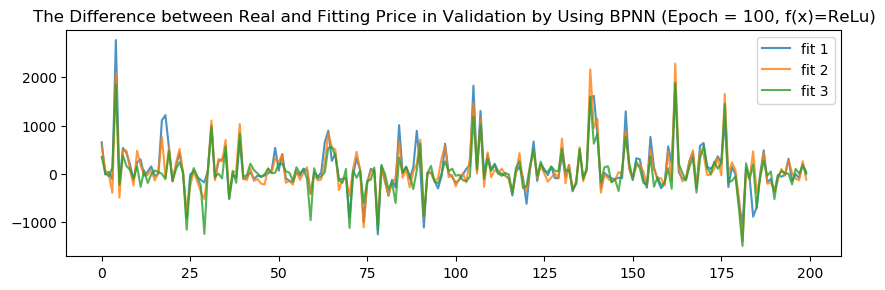

In [22]:

y2 = data_test2['price'] - data_test2['price_pred_test_5']
y3 = data_test2['price'] - data_test2['price_pred_test_10']
y4 = data_test2['price'] - data_test2['price_pred_test_20']

# 設定圖片大小為長15、寬10
plt.figure(figsize=(10,3),dpi=100,linewidth = 2)
plt.title('The Difference between Real and Fitting Price in Validation by Using BPNN (Epoch = 100, f(x)=ReLu)') 

plt.plot(y2[0:200],'-', alpha = 0.8, label='fit 1')
plt.plot(y3[0:200],'-', alpha = 0.8, label='fit 2')
plt.plot(y4[0:200],'-', alpha = 0.8, label='fit 3')
plt.legend(loc = 'upper right')
plt.show()

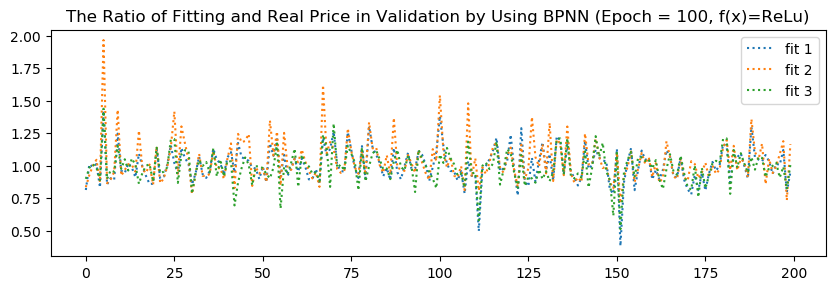

In [23]:

y2 = data_test2['price_pred_test_5'] / data_test2['price']
y3 = data_test2['price_pred_test_10'] / data_test2['price']
y4 = data_test2['price_pred_test_20'] / data_test2['price']

# 設定圖片大小為長15、寬10
plt.figure(figsize=(10,3),dpi=100,linewidth = 2)
plt.title('The Ratio of Fitting and Real Price in Validation by Using BPNN (Epoch = 100, f(x)=ReLu)') 

plt.plot(y2[0:200],':', label='fit 1')
plt.plot(y3[0:200],':', label='fit 2')
plt.plot(y4[0:200],':', label='fit 3')
plt.legend(loc = 'upper right')
plt.show()

### 以下是函數換成sigmoid的

In [9]:
scores2

[31148786.66370041, 31018650.58954394, 31004499.009269558]

In [10]:
rmse_test

[633.6366269400784, 601.0845146483147, 598.0563832114829]

In [11]:
R_square

[0.9816783502443908, 0.9801716357053067, 0.9887622835618097]

In [12]:
data_test2.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price_pred_test_5,price_pred_test_10,price_pred_test_20
0,4015,0.470324,Premium,E,I1,-0.936496,2.040756,3519,0.704045,0.633295,0.536049,2889.794922,2709.641113,3202.771484
1,39212,-0.586259,Ideal,H,SI2,-0.519242,-1.103130,1065,-0.454847,-0.469145,-0.502480,1239.898438,1083.023682,982.830566
2,10234,0.829562,Premium,I,SI2,0.593435,0.244250,4745,0.909080,0.831390,0.943040,4373.990234,4474.350586,4661.558594
3,19949,1.822749,Good,J,VS2,1.845196,-1.552257,8496,1.533098,1.554867,1.813159,9280.001953,8895.639648,8904.542969
4,26801,1.526906,Very Good,F,VS1,1.149773,1.142503,16670,1.399380,1.305095,1.504407,14406.229492,14743.513672,14745.686523


In [13]:
data_test2.to_excel('data_test5.xlsx')
data_test5 = pd.read_excel('data_test5.xlsx')

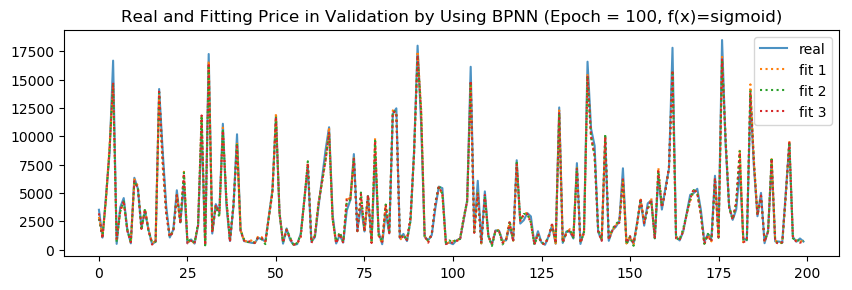

In [17]:
y1 = data_test5['price']
y2 = data_test5['price_pred_test_5']
y3 = data_test5['price_pred_test_10']
y4 = data_test5['price_pred_test_20']

# 設定圖片大小為長15、寬10
plt.figure(figsize=(10,3),dpi=100,linewidth = 2)
plt.title('Real and Fitting Price in Validation by Using BPNN (Epoch = 100, f(x)=sigmoid)') 
plt.plot(y1[0:200],'-', alpha = 0.8, label='real')
plt.plot(y2[0:200],':', label='fit 1')
plt.plot(y3[0:200],':', label='fit 2')
plt.plot(y4[0:200],':', label='fit 3')
plt.legend(loc = 'upper right')
plt.show()

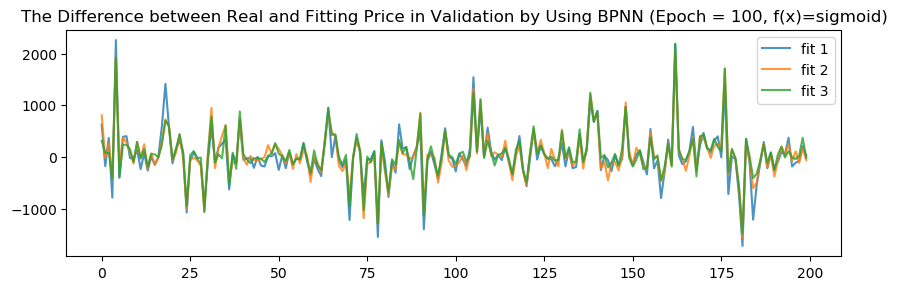

In [18]:
y2 = data_test5['price'] - data_test5['price_pred_test_5']
y3 = data_test5['price'] - data_test5['price_pred_test_10']
y4 = data_test5['price'] - data_test5['price_pred_test_20']

# 設定圖片大小為長15、寬10
plt.figure(figsize=(10,3),dpi=100,linewidth = 2)
plt.title('The Difference between Real and Fitting Price in Validation by Using BPNN (Epoch = 100, f(x)=sigmoid)') 

plt.plot(y2[0:200],'-', alpha = 0.8, label='fit 1')
plt.plot(y3[0:200],'-', alpha = 0.8, label='fit 2')
plt.plot(y4[0:200],'-', alpha = 0.8, label='fit 3')
plt.legend(loc = 'upper right')
plt.show()

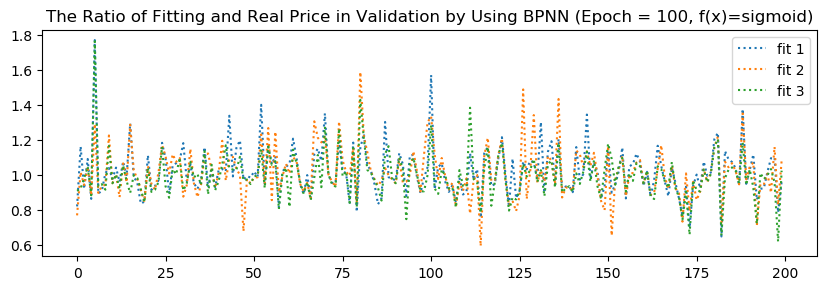

In [19]:
y2 = data_test5['price_pred_test_5'] / data_test5['price']
y3 = data_test5['price_pred_test_10'] / data_test5['price']
y4 = data_test5['price_pred_test_20'] / data_test5['price']

# 設定圖片大小為長15、寬10
plt.figure(figsize=(10,3),dpi=100,linewidth = 2)
plt.title('The Ratio of Fitting and Real Price in Validation by Using BPNN (Epoch = 100, f(x)=sigmoid)') 

plt.plot(y2[0:200],':', label='fit 1')
plt.plot(y3[0:200],':', label='fit 2')
plt.plot(y4[0:200],':', label='fit 3')
plt.legend(loc = 'upper right')
plt.show()

## 兩層隱藏層，每層使用 0-3 個神經元

In [124]:
data_train = pd.read_csv('train.csv') #pandas以DataFrame的格式读入excel表
data_train1 = pd.read_csv('train.csv')
data_valid = pd.read_csv('valid.csv') #pandas以DataFrame的格式读入excel表
data_test = pd.read_csv('test.csv') #pandas以DataFrame的格式读入excel表
modelfile = 'modelweight.model' #神经网络权重保存

In [125]:
feature_dummy = list(pd.get_dummies(data_train).columns[1:].drop('price'))
feature = ['carat','depth','table','x','y','z']
label = ['price']
data_train_mean = data_train[feature + label].mean()
data_train_std = data_train[feature + label].std()

In [126]:
train_standard_dummy = pd.get_dummies(pd.read_excel('train_standard_d.xlsx'))

In [127]:
#2 数据预处理和标注-2
train_x = train_standard_dummy[feature + feature_dummy].as_matrix()
train_y = train_standard_dummy[label].as_matrix()

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [128]:
data_test.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,4015,1.02,Premium,E,I1,60.4,62.0,3519,6.52,6.47,3.92
1,39212,0.52,Ideal,H,SI2,61.0,55.0,1065,5.22,5.19,3.18
2,10234,1.19,Premium,I,SI2,62.6,58.0,4745,6.75,6.70,4.21
3,19949,1.66,Good,J,VS2,64.4,54.0,8496,7.45,7.54,4.83
4,26801,1.52,Very Good,F,VS1,63.4,60.0,16670,7.30,7.25,4.61


In [129]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [130]:
for k in (feature):
    for j in range(0, len(data_test)):
        data_test.loc[j,[k]] = (data_test.loc[j,[k]] - data_train_mean_f[k])/data_train_std_f[k] #数据标准化       
    data_test_standard_dummy = pd.get_dummies(data_test)

In [131]:
data_test_standard_dummy.head(5)

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,4015,0.470324,-0.936496,2.040756,3519,0.704045,0.633295,0.536049,0,0,...,0,0,1,0,0,0,0,0,0,0
1,39212,-0.586259,-0.519242,-1.103130,1065,-0.454847,-0.469145,-0.502480,0,0,...,0,0,0,0,0,1,0,0,0,0
2,10234,0.829562,0.593435,0.244250,4745,0.909080,0.831390,0.943040,0,0,...,1,0,0,0,0,1,0,0,0,0
3,19949,1.822749,1.845196,-1.552257,8496,1.533098,1.554867,1.813159,0,1,...,0,1,0,0,0,0,0,1,0,0
4,26801,1.526906,1.149773,1.142503,16670,1.399380,1.305095,1.504407,0,0,...,0,0,0,0,0,0,1,0,0,0


In [159]:
 #3 建立一个简单BP神经网络模型
 # 要跑 18 分鐘
data_train_mean_f = data_train1[feature].mean()
data_train_std_f = data_train1[feature].std()
hidden_layer1 = [0, 1, 2, 3]
hidden_layer2 = [0, 1, 2, 3]
n_epoch = 100
scores_3 = []
rmse_test_3 = []
R_square_3 = []
k = 0
y_mean = data_test[label].mean()
    
for i in range(0,4):
    for j in range(0,4):
        # 建模
        if i != 0 and j == 0:
            model = Sequential()  #层次模型
            model.add(Dense(hidden_layer1[i], input_dim = len(feature + feature_dummy), init = 'uniform')) #输入层
            model.add(Activation('relu'))  #添加激活函数
            model.add(Dense(units = len(label), input_dim = hidden_layer1[i])) #输出层
            model.compile(loss = 'mean_squared_error', optimizer = 'adam') #编译模型
            model.fit(train_x, train_y, nb_epoch = n_epoch, batch_size = int(len(data_train)/n_epoch)+1)
            model.save_weights(modelfile) #保存模型权重
            print(model.summary())
            
        elif i == 0 and j != 0:
            model = Sequential()  #层次模型
            model.add(Dense(hidden_layer2[j], input_dim = len(feature + feature_dummy), init = 'uniform')) #输入层
            model.add(Activation('sigmoid'))  #添加激活函数
            model.add(Dense(units = len(label), input_dim = hidden_layer2[j])) #输出层
            model.compile(loss = 'mean_squared_error', optimizer = 'adam') #编译模型
            model.fit(train_x, train_y, nb_epoch = n_epoch, batch_size = int(len(data_train)/n_epoch)+1)
            model.save_weights(modelfile) #保存模型权重
            print(model.summary())
            
        elif i != 0 and j != 0:
            model = Sequential()  #层次模型
            model.add(Dense(hidden_layer1[i], input_dim = len(feature + feature_dummy), init = 'uniform')) #输入层
            model.add(Activation('relu'))  #添加激活函数
            model.add(Dense(hidden_layer2[j], input_dim = hidden_layer1[i], init = 'uniform')) #输入层
            model.add(Activation('sigmoid'))  #添加激活函数
            model.add(Dense(units = len(label), input_dim = hidden_layer2[j])) #输出层
            model.compile(loss = 'mean_squared_error', optimizer = 'adam') #编译模型
            model.fit(train_x, train_y, nb_epoch = n_epoch, batch_size = int(len(data_train)/n_epoch)+1)
            model.save_weights(modelfile) #保存模型权重
            print(model.summary())
            
        #因為寫在j迴圈的外面，所以會有(0,0)出現    
        # 結果寫入 data_test
        test_x = (data_test_standard_dummy[feature + feature_dummy]).as_matrix()
        data_test[u'price_pred_test_{a}_{b}'.format(a=hidden_layer1[i], b=hidden_layer2[j])] = model.predict(test_x) * data_train1['price'].std() + data_train1['price'].mean()

        # 算 score 與 RMSE
        scores_3.append(model.evaluate(test_x, data_test['price_pred_test_{a}_{b}'.format(a=hidden_layer1[i], b=hidden_layer2[j])]))
        rmse_test_3.append(rmse(data_test['price_pred_test_{a}_{b}'.format(a=hidden_layer1[i], b=hidden_layer2[j])],data_test['price']))

        #算 R平方
        SST_test = []
        SSR_test = []
        for l in range(0,len(data_test)):
            SST_test.append((data_test.loc[l, ['price']] - y_mean)**2)
            SSR_test.append((data_test.iloc[l,11+k] - y_mean)**2)
        sst_test = sum(SST_test)
        ssr_test = sum(SSR_test)
        R_square_3.append(ssr_test[0] / sst_test[0])
        k += 1

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


10788/10788 [==============================] - 1s 119us/step


C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=32, kernel_initializer="uniform")`
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:33: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
32364/32364 [==============================] - 7s 230us/step - loss: 0.9800
Epoch 2/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.7702
Epoch 3/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.6504
Epoch 4/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.5589
Epoch 5/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.4864
Epoch 6/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.4279
Epoch 7/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.3798
Epoch 8/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.3397
Epoch 9/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.3057
Epoch 10/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.2766
Epoch 11/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.2515
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, input_dim=32, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 6s 177us/step - loss: 0.9164
Epoch 2/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.6494
Epoch 3/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.4877
Epoch 4/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.3829
Epoch 5/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.3113
Epoch 6/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.2593
Epoch 7/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.2196
Epoch 8/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.1882
Epoch 9/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.1631
Epoch 10/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.1430
Epoch 11/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.1268
Epoch 12/100
32364/32364 [==============

32364/32364 [==============================] - 1s 17us/step - loss: 0.0285
Epoch 95/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0285
Epoch 96/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.0285
Epoch 97/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0285
Epoch 98/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.0284
Epoch 99/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0284
Epoch 100/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0284
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_276 (Dense)            (None, 2)                 66        
_________________________________________________________________
activation_166 (Activation)  (None, 2)                 0         
_________________________________________________________________


C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, input_dim=32, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 5s 162us/step - loss: 0.7301
Epoch 2/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.3826
Epoch 3/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.2552
Epoch 4/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.1945
Epoch 5/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.1583
Epoch 6/100
32364/32364 [==============================] - ETA: 0s - loss: 0.134 - 1s 16us/step - loss: 0.1324
Epoch 7/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.1124
Epoch 8/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.0967
Epoch 9/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.0845
Epoch 10/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.0750
Epoch 11/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0676
Epoch 12/100
323

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=32, kernel_initializer="uniform")`
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
32364/32364 [==============================] - 5s 163us/step - loss: 0.7735
Epoch 2/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.6317
Epoch 3/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.5659
Epoch 4/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.5128
Epoch 5/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.4678
Epoch 6/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.4287
Epoch 7/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.3941
Epoch 8/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.3633
Epoch 9/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.3358
Epoch 10/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.3111
Epoch 11/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.2888
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=32, kernel_initializer="uniform")`
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=1, kernel_initializer="uniform")`
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:45: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
32364/32364 [==============================] - 5s 170us/step - loss: 1.5314
Epoch 2/100
32364/32364 [==============================] - 1s 19us/step - loss: 1.1275
Epoch 3/100
32364/32364 [==============================] - 1s 26us/step - loss: 0.8466
Epoch 4/100
32364/32364 [==============================] - 1s 24us/step - loss: 0.7222
Epoch 5/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.6614
Epoch 6/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.6211
Epoch 7/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.5871
Epoch 8/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.5550
Epoch 9/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.5233
Epoch 10/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.4916
Epoch 11/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.4600
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, input_dim=1, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 6s 184us/step - loss: 1.0366
Epoch 2/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.9554
Epoch 3/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.8771
Epoch 4/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.7784
Epoch 5/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.6824
Epoch 6/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.6002
Epoch 7/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.5309
Epoch 8/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.4728
Epoch 9/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.4242
Epoch 10/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.3827
Epoch 11/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.3468
Epoch 12/100
32364/32364 [==============

32364/32364 [==============================] - 0s 14us/step - loss: 0.0413
Epoch 95/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.0412
Epoch 96/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0411
Epoch 97/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0410
Epoch 98/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.0408
Epoch 99/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.0407
Epoch 100/100
32364/32364 [==============================] - 1s 36us/step - loss: 0.0408
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_285 (Dense)            (None, 1)                 33        
_________________________________________________________________
activation_171 (Activation)  (None, 1)                 0         
_________________________________________________________________


C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, input_dim=1, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 8s 240us/step - loss: 1.1903
Epoch 2/100
32364/32364 [==============================] - 1s 27us/step - loss: 0.8878
Epoch 3/100
32364/32364 [==============================] - 1s 23us/step - loss: 0.7127
Epoch 4/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.6086
Epoch 5/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.5271
Epoch 6/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.4581
Epoch 7/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.3977
Epoch 8/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.3418
Epoch 9/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.2880
Epoch 10/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.2399
Epoch 11/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.1996
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, input_dim=32, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 6s 177us/step - loss: 0.8634
Epoch 2/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.6465
Epoch 3/100
32364/32364 [==============================] - 1s 23us/step - loss: 0.5662
Epoch 4/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.5073
Epoch 5/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.4590
Epoch 6/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.4183
Epoch 7/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.3831
Epoch 8/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.3521
Epoch 9/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.3246
Epoch 10/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.2999
Epoch 11/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.2778
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, input_dim=32, kernel_initializer="uniform")`
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=2, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 6s 174us/step - loss: 1.1998
Epoch 2/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.8899
Epoch 3/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.7560
Epoch 4/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.7055
Epoch 5/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.6679
Epoch 6/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.6320
Epoch 7/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.5961
Epoch 8/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.5606
Epoch 9/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.5259
Epoch 10/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.4925
Epoch 11/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.4608
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, input_dim=2, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 6s 184us/step - loss: 0.9807
Epoch 2/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.6830
Epoch 3/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.5122
Epoch 4/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.4218
Epoch 5/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.3588
Epoch 6/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.3096
Epoch 7/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.2693
Epoch 8/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.2355
Epoch 9/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.2071
Epoch 10/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.1836
Epoch 11/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.1642
Epoch 12/100
32364/32364 [==============

32364/32364 [==============================] - 1s 16us/step - loss: 0.0271
Epoch 95/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.0271
Epoch 96/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.0270
Epoch 97/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0271
Epoch 98/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.0270
Epoch 99/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0270
Epoch 100/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0270
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_296 (Dense)            (None, 2)                 66        
_________________________________________________________________
activation_178 (Activation)  (None, 2)                 0         
_________________________________________________________________


C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, input_dim=2, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 6s 181us/step - loss: 0.9690
Epoch 2/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.7645
Epoch 3/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.5726
Epoch 4/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.4599
Epoch 5/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.3790
Epoch 6/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.3116
Epoch 7/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.2535
Epoch 8/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.2060
Epoch 9/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.1691
Epoch 10/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.1407
Epoch 11/100
32364/32364 [==============================] - 1s 23us/step - loss: 0.1187
Epoch 12/100
32364/32364 [==============

32364/32364 [==============================] - 0s 14us/step - loss: 0.0293
Epoch 95/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0292
Epoch 96/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0292
Epoch 97/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0291
Epoch 98/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0291
Epoch 99/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0291
Epoch 100/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0290
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_299 (Dense)            (None, 2)                 66        
_________________________________________________________________
activation_180 (Activation)  (None, 2)                 0         
_________________________________________________________________


C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, input_dim=32, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 6s 173us/step - loss: 0.4802
Epoch 2/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.1339
Epoch 3/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.0897
Epoch 4/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0692
Epoch 5/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.0608
Epoch 6/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.0557
Epoch 7/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.0515
Epoch 8/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0478
Epoch 9/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0447
Epoch 10/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0419
Epoch 11/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0398
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, input_dim=32, kernel_initializer="uniform")`
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=3, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 6s 182us/step - loss: 1.0001
Epoch 2/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.9313
Epoch 3/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.7841
Epoch 4/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.6750
Epoch 5/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.6018
Epoch 6/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.5453
Epoch 7/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.4982
Epoch 8/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.4567
Epoch 9/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.4196
Epoch 10/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.3865
Epoch 11/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.3572
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, input_dim=3, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 7s 201us/step - loss: 0.9965
Epoch 2/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.8907
Epoch 3/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.6948
Epoch 4/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.5706
Epoch 5/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.4939
Epoch 6/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.4381
Epoch 7/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.3928
Epoch 8/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.3537
Epoch 9/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.3194
Epoch 10/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.2895
Epoch 11/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.2636
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, input_dim=3, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 6s 190us/step - loss: 0.9931
Epoch 2/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.5736
Epoch 3/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.3380
Epoch 4/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.2689
Epoch 5/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.2290
Epoch 6/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.1951
Epoch 7/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.1656
Epoch 8/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.1419
Epoch 9/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.1239
Epoch 10/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.1102
Epoch 11/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0993
Epoch 12/100
32364/32364 [==============

In [160]:
scores_3

[30150383.0315165,
 30523857.73377827,
 30734651.0819429,
 30567817.570634037,
 30149106.120875046,
 30477861.19243604,
 30566637.81831665,
 30544409.853911754,
 29740474.88320356,
 30647253.484612532,
 30808166.1638858,
 30467578.88172043,
 30259153.121245828,
 29327917.94141639,
 31020139.654430848,
 30507476.19873934]

In [161]:
rmse_test_3

[630.3160783219859,
 762.2135223832524,
 654.1529753316223,
 642.8464170865692,
 1093.0026954140487,
 753.6270532455559,
 799.0820410278354,
 718.1401304001063,
 1036.7959801337895,
 668.2942052830778,
 654.7253397374902,
 664.1907918640264,
 645.618989099555,
 788.2682005232041,
 636.1901497373301,
 630.3474171407755]

In [162]:
R_square_3

[0.9437480810816687,
 0.9572065855684612,
 0.9730033376985363,
 0.9630342607369001,
 0.9308953833475706,
 0.9552559108352437,
 0.9541898368980765,
 0.9664771315695705,
 0.9287256859870563,
 0.9677584357785963,
 0.9724883330142516,
 0.9711623483515686,
 0.9482525793268611,
 0.9175409954550238,
 0.9857348396936924,
 0.9580645372716484]

In [163]:
data_test.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,...,price_pred_test_1_2,price_pred_test_1_3,price_pred_test_2_0,price_pred_test_2_1,price_pred_test_2_2,price_pred_test_2_3,price_pred_test_3_0,price_pred_test_3_1,price_pred_test_3_2,price_pred_test_3_3
0,4015,0.470324,Premium,E,I1,-0.936496,2.040756,3519,0.704045,0.633295,...,1643.754639,2250.928223,3609.835449,2089.427490,2142.204590,2725.854248,3009.947266,1799.555908,2561.897949,2883.004395
1,39212,-0.586259,Ideal,H,SI2,-0.519242,-1.103130,1065,-0.454847,-0.469145,...,794.669434,835.578857,-327.960938,839.852539,848.328369,992.022949,913.728027,887.963379,921.145996,1027.749023
2,10234,0.829562,Premium,I,SI2,0.593435,0.244250,4745,0.909080,0.831390,...,3741.555176,3853.465088,5102.610352,4408.782227,4639.377930,4276.772949,4789.775391,3635.518311,4691.404785,4398.551758
3,19949,1.822749,Good,J,VS2,1.845196,-1.552257,8496,1.533098,1.554867,...,9974.367188,9735.856445,10883.833008,9417.755859,8840.695312,9404.253906,8648.014648,9924.306641,9005.453125,9317.642578
4,26801,1.526906,Very Good,F,VS1,1.149773,1.142503,16670,1.399380,1.305095,...,13126.835938,13825.378906,11481.936523,14527.639648,14285.916016,14506.264648,13913.145508,13093.523438,14425.147461,14602.985352


In [164]:
data_test.to_excel('data_test_w2hidden_layer.xlsx')

In [24]:
data_test = pd.read_excel('data_test_w2hidden_layer.xlsx')

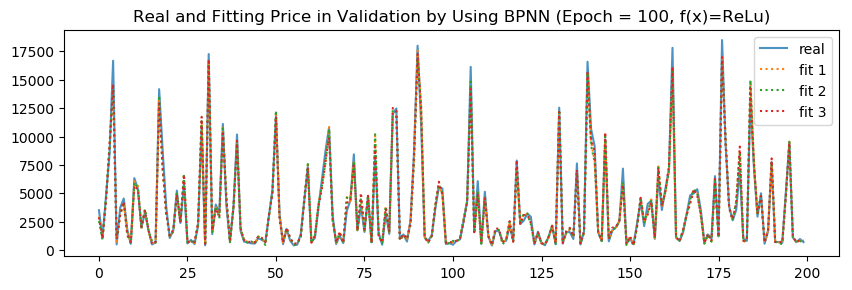

In [25]:
y1 = data_test['price']
y2 = data_test['price_pred_test_0_3']
y3 = data_test['price_pred_test_3_2']
y4 = data_test['price_pred_test_3_3']


# 設定圖片大小為長15、寬10
plt.figure(figsize=(10,3),dpi=100,linewidth = 2)
plt.title('Real and Fitting Price in Validation by Using BPNN (Epoch = 100, f(x)=ReLu)') 
plt.plot(y1[0:200],'-', alpha = 0.8, label='real')
plt.plot(y2[0:200],':', label='fit 1')
plt.plot(y3[0:200],':', label='fit 2')
plt.plot(y4[0:200],':', label='fit 3')
plt.legend(loc = 'upper right')
plt.show()

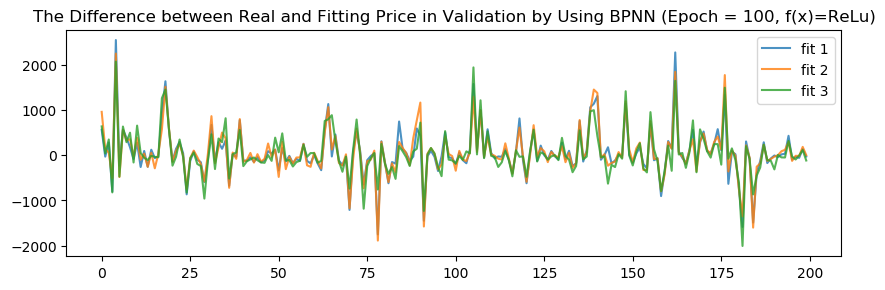

In [26]:
y2 = data_test['price'] - data_test['price_pred_test_0_3']
y3 = data_test['price'] - data_test['price_pred_test_3_2']
y4 = data_test['price'] - data_test['price_pred_test_3_3']

# 設定圖片大小為長15、寬10
plt.figure(figsize=(10,3),dpi=100,linewidth = 2)
plt.title('The Difference between Real and Fitting Price in Validation by Using BPNN (Epoch = 100, f(x)=ReLu)') 

plt.plot(y2[0:200],'-', alpha = 0.8, label='fit 1')
plt.plot(y3[0:200],'-', alpha = 0.8, label='fit 2')
plt.plot(y4[0:200],'-', alpha = 0.8, label='fit 3')
plt.legend(loc = 'upper right')
plt.show()

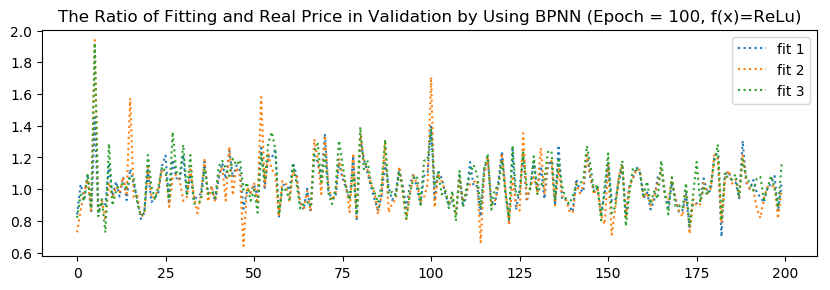

In [27]:
y2 = data_test['price_pred_test_0_3'] / data_test['price']
y3 = data_test['price_pred_test_3_2'] / data_test['price']
y4 = data_test['price_pred_test_3_3'] / data_test['price']

# 設定圖片大小為長15、寬10
plt.figure(figsize=(10,3),dpi=100,linewidth = 2)
plt.title('The Ratio of Fitting and Real Price in Validation by Using BPNN (Epoch = 100, f(x)=ReLu)') 

plt.plot(y2[0:200],':', label='fit 1')
plt.plot(y3[0:200],':', label='fit 2')
plt.plot(y4[0:200],':', label='fit 3')
plt.legend(loc = 'upper right')
plt.show()

## 兩層隱藏層，每層使用 0, 5, 8, 10 個神經元

In [174]:
data_train = pd.read_csv('train.csv') #pandas以DataFrame的格式读入excel表
data_train1 = pd.read_csv('train.csv')
data_valid = pd.read_csv('valid.csv') #pandas以DataFrame的格式读入excel表
data_test3 = pd.read_csv('test.csv') #pandas以DataFrame的格式读入excel表
modelfile = 'modelweight.model' #神经网络权重保存
feature_dummy = list(pd.get_dummies(data_train).columns[1:].drop('price'))
feature = ['carat','depth','table','x','y','z']
label = ['price']
data_train_mean = data_train[feature + label].mean()
data_train_std = data_train[feature + label].std()
train_standard_dummy = pd.get_dummies(pd.read_excel('train_standard_d.xlsx'))

#2 数据预处理和标注-2
train_x = train_standard_dummy[feature + feature_dummy].as_matrix()
train_y = train_standard_dummy[label].as_matrix()

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [175]:
data_test3.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,4015,1.02,Premium,E,I1,60.4,62.0,3519,6.52,6.47,3.92
1,39212,0.52,Ideal,H,SI2,61.0,55.0,1065,5.22,5.19,3.18
2,10234,1.19,Premium,I,SI2,62.6,58.0,4745,6.75,6.70,4.21
3,19949,1.66,Good,J,VS2,64.4,54.0,8496,7.45,7.54,4.83
4,26801,1.52,Very Good,F,VS1,63.4,60.0,16670,7.30,7.25,4.61


In [176]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [177]:
for k in (feature):
    for j in range(0, len(data_test3)):
        data_test3.loc[j,[k]] = (data_test3.loc[j,[k]] - data_train_mean_f[k])/data_train_std_f[k] #数据标准化       
    data_test_standard_dummy3 = pd.get_dummies(data_test3)

In [178]:
data_test_standard_dummy3.head(5)

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,4015,0.470324,-0.936496,2.040756,3519,0.704045,0.633295,0.536049,0,0,...,0,0,1,0,0,0,0,0,0,0
1,39212,-0.586259,-0.519242,-1.103130,1065,-0.454847,-0.469145,-0.502480,0,0,...,0,0,0,0,0,1,0,0,0,0
2,10234,0.829562,0.593435,0.244250,4745,0.909080,0.831390,0.943040,0,0,...,1,0,0,0,0,1,0,0,0,0
3,19949,1.822749,1.845196,-1.552257,8496,1.533098,1.554867,1.813159,0,1,...,0,1,0,0,0,0,0,1,0,0
4,26801,1.526906,1.149773,1.142503,16670,1.399380,1.305095,1.504407,0,0,...,0,0,0,0,0,0,1,0,0,0


In [179]:
 #3 建立一个简单BP神经网络模型
 # 要跑 37 分鐘
data_train_mean_f = data_train1[feature].mean()
data_train_std_f = data_train1[feature].std()
hidden_layer1 = [0, 5, 8, 10]
hidden_layer2 = [0, 5, 8, 10]
n_epoch = 100
scores_4 = []
rmse_test_4 = []
R_square_4 = []
k = 0
y_mean = data_test[label].mean()
    
for i in range(0,len(hidden_layer1)):
    for j in range(0,len(hidden_layer2)):
        # 建模
        if i != 0 and j == 0:
            model = Sequential()  #层次模型
            model.add(Dense(hidden_layer1[i], input_dim = len(feature + feature_dummy), init = 'uniform')) #输入层
            model.add(Activation('relu'))  #添加激活函数
            model.add(Dense(units = len(label), input_dim = hidden_layer1[i])) #输出层
            model.compile(loss = 'mean_squared_error', optimizer = 'adam') #编译模型
            model.fit(train_x, train_y, nb_epoch = n_epoch, batch_size = int(len(data_train)/n_epoch)+1)
            model.save_weights(modelfile) #保存模型权重
            print(model.summary())
            
        elif i == 0 and j != 0:
            model = Sequential()  #层次模型
            model.add(Dense(hidden_layer2[j], input_dim = len(feature + feature_dummy), init = 'uniform')) #输入层
            model.add(Activation('sigmoid'))  #添加激活函数
            model.add(Dense(units = len(label), input_dim = hidden_layer2[j])) #输出层
            model.compile(loss = 'mean_squared_error', optimizer = 'adam') #编译模型
            model.fit(train_x, train_y, nb_epoch = n_epoch, batch_size = int(len(data_train)/n_epoch)+1)
            model.save_weights(modelfile) #保存模型权重
            print(model.summary())
            
        elif i != 0 and j != 0:
            model = Sequential()  #层次模型
            model.add(Dense(hidden_layer1[i], input_dim = len(feature + feature_dummy), init = 'uniform')) #输入层
            model.add(Activation('relu'))  #添加激活函数
            model.add(Dense(hidden_layer2[j], input_dim = hidden_layer1[i], init = 'uniform')) #输入层
            model.add(Activation('sigmoid'))  #添加激活函数
            model.add(Dense(units = len(label), input_dim = hidden_layer2[j])) #输出层
            model.compile(loss = 'mean_squared_error', optimizer = 'adam') #编译模型
            model.fit(train_x, train_y, nb_epoch = n_epoch, batch_size = int(len(data_train)/n_epoch)+1)
            model.save_weights(modelfile) #保存模型权重
            print(model.summary())
            
        #因為寫在j迴圈的外面，所以會有(0,0)出現    
        # 結果寫入 data_test3
        test_x = (data_test_standard_dummy3[feature + feature_dummy]).as_matrix()
        data_test3[u'price_pred_test_{a}_{b}'.format(a=hidden_layer1[i], b=hidden_layer2[j])] = model.predict(test_x) * data_train1['price'].std() + data_train1['price'].mean()

        # 算 score 與 RMSE
        scores_4.append(model.evaluate(test_x, data_test3['price_pred_test_{a}_{b}'.format(a=hidden_layer1[i], b=hidden_layer2[j])]))
        rmse_test_4.append(rmse(data_test3['price_pred_test_{a}_{b}'.format(a=hidden_layer1[i], b=hidden_layer2[j])],data_test3['price']))

        #算 R平方
        SST_test = []
        SSR_test = []
        for l in range(0,len(data_test3)):
            SST_test.append((data_test3.loc[l, ['price']] - y_mean)**2)
            SSR_test.append((data_test3.iloc[l,11+k] - y_mean)**2)
        sst_test = sum(SST_test)
        ssr_test = sum(SSR_test)
        R_square_4.append(ssr_test[0] / sst_test[0])
        k += 1

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


10788/10788 [==============================] - 1s 116us/step


C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, input_dim=32, kernel_initializer="uniform")`
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:33: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
32364/32364 [==============================] - 8s 245us/step - loss: 0.6334
Epoch 2/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.2853
Epoch 3/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.1916
Epoch 4/100
32364/32364 [==============================] - 0s 13us/step - loss: 0.1532
Epoch 5/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.1275
Epoch 6/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.1078
Epoch 7/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.0923
Epoch 8/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.0799
Epoch 9/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.0702
Epoch 10/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0627
Epoch 11/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0569
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=32, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 8s 242us/step - loss: 1.0579
Epoch 2/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.3890
Epoch 3/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.2953
Epoch 4/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.2686
Epoch 5/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.2515
Epoch 6/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.2358
Epoch 7/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.2205
Epoch 8/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.2057
Epoch 9/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.1915
Epoch 10/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.1774
Epoch 11/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.1636
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=32, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 7s 226us/step - loss: 0.4598
Epoch 2/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.1866
Epoch 3/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.1499
Epoch 4/100
32364/32364 [==============================] - 1s 24us/step - loss: 0.1296
Epoch 5/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.1141
Epoch 6/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.1005
Epoch 7/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.0886
Epoch 8/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.0781
Epoch 9/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.0693
Epoch 10/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.0622
Epoch 11/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0566
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, input_dim=32, kernel_initializer="uniform")`
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
32364/32364 [==============================] - 7s 225us/step - loss: 0.5279
Epoch 2/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.1403
Epoch 3/100
32364/32364 [==============================] - 1s 24us/step - loss: 0.0919
Epoch 4/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.0732
Epoch 5/100
32364/32364 [==============================] - 1s 23us/step - loss: 0.0648
Epoch 6/100
32364/32364 [==============================] - 1s 25us/step - loss: 0.0601
Epoch 7/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.0558
Epoch 8/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.0527
Epoch 9/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.0496
Epoch 10/100
32364/32364 [==============================] - 0s 14us/step - loss: 0.0468
Epoch 11/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.0439
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, input_dim=32, kernel_initializer="uniform")`
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, input_dim=5, kernel_initializer="uniform")`
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:45: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
32364/32364 [==============================] - 8s 240us/step - loss: 0.9734
Epoch 2/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.4125
Epoch 3/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.2922
Epoch 4/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.2380
Epoch 5/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.1911
Epoch 6/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.1574
Epoch 7/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.1326
Epoch 8/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.1134
Epoch 9/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0985
Epoch 10/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0867
Epoch 11/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0771
Epoch 12/100
32364/32364 [==============

Epoch 94/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.0217
Epoch 95/100
32364/32364 [==============================] - 1s 23us/step - loss: 0.0218: 0s - loss: 0
Epoch 96/100
32364/32364 [==============================] - 1s 30us/step - loss: 0.0216: 0s - loss:
Epoch 97/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.0216
Epoch 98/100
32364/32364 [==============================] - 1s 26us/step - loss: 0.0216: 1s 
Epoch 99/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.0215
Epoch 100/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.0215
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_321 (Dense)            (None, 5)                 165       
_________________________________________________________________
activation_193 (Activation)  (None, 5)                 0         
______________________

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=5, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 10s 319us/step - loss: 1.2337
Epoch 2/100
32364/32364 [==============================] - 1s 25us/step - loss: 0.5133
Epoch 3/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.3975
Epoch 4/100
32364/32364 [==============================] - 1s 25us/step - loss: 0.3375
Epoch 5/100
32364/32364 [==============================] - 1s 23us/step - loss: 0.2909
Epoch 6/100
32364/32364 [==============================] - 1s 36us/step - loss: 0.2519
Epoch 7/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.2180
Epoch 8/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.1888
Epoch 9/100
32364/32364 [==============================] - 2s 49us/step - loss: 0.1641
Epoch 10/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.1429
Epoch 11/100
32364/32364 [==============================] - 1s 30us/step - loss: 0.1245: 0s - 
Epoch 12/100
32364/32364 [======

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=5, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 7s 218us/step - loss: 0.8191
Epoch 2/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.2843
Epoch 3/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.1539
Epoch 4/100
32364/32364 [==============================] - 1s 15us/step - loss: 0.1034
Epoch 5/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.0843
Epoch 6/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.0733
Epoch 7/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.0653
Epoch 8/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.0592
Epoch 9/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.0545
Epoch 10/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.0507
Epoch 11/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.0478
Epoch 12/100
32364/32364 [==============

32364/32364 [==============================] - 0s 15us/step - loss: 0.0245
Epoch 95/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0243
Epoch 96/100
32364/32364 [==============================] - 1s 39us/step - loss: 0.0243
Epoch 97/100
32364/32364 [==============================] - 1s 30us/step - loss: 0.0243
Epoch 98/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.0242
Epoch 99/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.0242
Epoch 100/100
32364/32364 [==============================] - 1s 24us/step - loss: 0.0242
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_327 (Dense)            (None, 5)                 165       
_________________________________________________________________
activation_197 (Activation)  (None, 5)                 0         
_________________________________________________________________


C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=32, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 7s 218us/step - loss: 0.3696
Epoch 2/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.1041
Epoch 3/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0689
Epoch 4/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.0573
Epoch 5/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.0504
Epoch 6/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0453
Epoch 7/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.0416
Epoch 8/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.0389
Epoch 9/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.0368
Epoch 10/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.0353
Epoch 11/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0338
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=32, kernel_initializer="uniform")`
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, input_dim=8, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 8s 248us/step - loss: 0.9710: 4s - loss: 1.
Epoch 2/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.4815
Epoch 3/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.3041
Epoch 4/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.2188: 0s - lo
Epoch 5/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.1589
Epoch 6/100
32364/32364 [==============================] - 1s 23us/step - loss: 0.1233: 0s - loss: 0.12
Epoch 7/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.1006
Epoch 8/100
32364/32364 [==============================] - 1s 27us/step - loss: 0.0846
Epoch 9/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0723
Epoch 10/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0620
Epoch 11/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0535

32364/32364 [==============================] - 1s 18us/step - loss: 0.0214
Epoch 94/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.0214
Epoch 95/100
32364/32364 [==============================] - 0s 15us/step - loss: 0.0213
Epoch 96/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0214
Epoch 97/100
32364/32364 [==============================] - 1s 17us/step - loss: 0.0214
Epoch 98/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.0213
Epoch 99/100
32364/32364 [==============================] - 1s 18us/step - loss: 0.0212
Epoch 100/100
32364/32364 [==============================] - 1s 16us/step - loss: 0.0213
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_332 (Dense)            (None, 8)                 264       
_________________________________________________________________
activation_200 (Activation)  (None, 8)      

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=8, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 7s 209us/step - loss: 0.7782
Epoch 2/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.2303
Epoch 3/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.1299
Epoch 4/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0899
Epoch 5/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0727
Epoch 6/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.0623
Epoch 7/100
32364/32364 [==============================] - ETA: 0s - loss: 0.054 - 1s 21us/step - loss: 0.0547
Epoch 8/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0485
Epoch 9/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.0432
Epoch 10/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0391
Epoch 11/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0365
Epoch 12/100
323

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=8, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 7s 216us/step - loss: 0.8272
Epoch 2/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.2062
Epoch 3/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.1517
Epoch 4/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.1209
Epoch 5/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.1022
Epoch 6/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0883
Epoch 7/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.0769
Epoch 8/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0676
Epoch 9/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0598
Epoch 10/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0533
Epoch 11/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0480
Epoch 12/100
32364/32364 [==============

Epoch 94/100
32364/32364 [==============================] - 1s 23us/step - loss: 0.0220
Epoch 95/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0220
Epoch 96/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.0220
Epoch 97/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.0218
Epoch 98/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.0219
Epoch 99/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.0219
Epoch 100/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.0219
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_338 (Dense)            (None, 8)                 264       
_________________________________________________________________
activation_204 (Activation)  (None, 8)                 0         
_____________________________________________________

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=32, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - ETA: 0s - loss: 0.390 - 7s 214us/step - loss: 0.3851
Epoch 2/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0936
Epoch 3/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.0675
Epoch 4/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0570
Epoch 5/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.0497
Epoch 6/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0445
Epoch 7/100
32364/32364 [==============================] - 1s 19us/step - loss: 0.0411
Epoch 8/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.0380
Epoch 9/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0362
Epoch 10/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0347
Epoch 11/100
32364/32364 [==============================] - 1s 20us/step - loss: 0.0337
Epoch 12/100
323

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=32, kernel_initializer="uniform")`
C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, input_dim=10, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 7s 221us/step - loss: 0.9788
Epoch 2/100
32364/32364 [==============================] - 1s 25us/step - loss: 0.4005
Epoch 3/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.2335
Epoch 4/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.1658
Epoch 5/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.1220
Epoch 6/100
32364/32364 [==============================] - 1s 23us/step - loss: 0.0957
Epoch 7/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.0788
Epoch 8/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.0672
Epoch 9/100
32364/32364 [==============================] - 1s 23us/step - loss: 0.0585
Epoch 10/100
32364/32364 [==============================] - 1s 23us/step - loss: 0.0517
Epoch 11/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.0463
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=10, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 7s 218us/step - loss: 0.7710
Epoch 2/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.2145
Epoch 3/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.1197
Epoch 4/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.0882
Epoch 5/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.0750
Epoch 6/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.0667
Epoch 7/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.0602
Epoch 8/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.0551
Epoch 9/100
32364/32364 [==============================] - 1s 24us/step - loss: 0.0509
Epoch 10/100
32364/32364 [==============================] - 1s 21us/step - loss: 0.0474
Epoch 11/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.0446
Epoch 12/100
32364/32364 [==============

C:\Users\user\AppData\Local\conda\conda\envs\MyPy\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=10, kernel_initializer="uniform")`


Epoch 1/100
32364/32364 [==============================] - 7s 230us/step - loss: 0.7229
Epoch 2/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.2150
Epoch 3/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.1256
Epoch 4/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.0885
Epoch 5/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.0729
Epoch 6/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.0633
Epoch 7/100
32364/32364 [==============================] - ETA: 0s - loss: 0.056 - 1s 23us/step - loss: 0.0565
Epoch 8/100
32364/32364 [==============================] - ETA: 0s - loss: 0.051 - 1s 23us/step - loss: 0.0512
Epoch 9/100
32364/32364 [==============================] - 1s 23us/step - loss: 0.0469: 0s - 
Epoch 10/100
32364/32364 [==============================] - 1s 22us/step - loss: 0.0432
Epoch 11/100
32364/32364 [==============================] - 1s 22us/step 

In [180]:
scores_4

[30507476.19873934,
 30902290.840192806,
 30806044.52206155,
 30930561.70856507,
 30547601.256210603,
 31212884.017797552,
 31174962.945494995,
 30448362.550982572,
 30617622.08676307,
 30859771.15461624,
 30375571.202076383,
 30567991.811642565,
 30738348.83796811,
 30930695.368186872,
 30931671.45124212,
 30293186.80608083]

In [181]:
rmse_test_4

[630.3474171407755,
 626.9936259468213,
 628.0820887206916,
 603.1805389389964,
 617.707099727201,
 591.5294748410213,
 616.0934968780783,
 607.2071683378524,
 603.7013716621314,
 587.551618951182,
 578.7942949817207,
 592.6542503125921,
 609.8434821121479,
 580.0283350591131,
 586.0307403545372,
 587.1821399644328]

In [182]:
R_square_4

[0.9580645372716484,
 0.9808045779189182,
 0.9822156543252187,
 0.9777523045710733,
 0.9727759866191001,
 0.9815628129022835,
 0.9747182694806792,
 0.9544348137413952,
 0.9703692087685568,
 0.994036235944762,
 0.944353239407371,
 0.9806038734185892,
 0.9565614324884507,
 0.9949420062957864,
 0.975564823825277,
 0.9626240122725489]

In [183]:
data_test3.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,...,price_pred_test_5_8,price_pred_test_5_10,price_pred_test_8_0,price_pred_test_8_5,price_pred_test_8_8,price_pred_test_8_10,price_pred_test_10_0,price_pred_test_10_5,price_pred_test_10_8,price_pred_test_10_10
0,4015,0.470324,Premium,E,I1,-0.936496,2.040756,3519,0.704045,0.633295,...,2948.501465,2929.366455,3332.908691,2927.778564,3048.119629,2954.419434,2966.152344,3059.470703,3048.739258,2933.500977
1,39212,-0.586259,Ideal,H,SI2,-0.519242,-1.103130,1065,-0.454847,-0.469145,...,1060.521240,1260.403564,942.292725,1007.876709,1068.031982,995.916260,1074.841797,1027.822998,1023.113281,1015.505371
2,10234,0.829562,Premium,I,SI2,0.593435,0.244250,4745,0.909080,0.831390,...,4571.532227,4585.068359,4861.146484,4571.881836,4729.637207,4652.298828,4922.593262,4276.362793,4751.516113,4754.313477
3,19949,1.822749,Good,J,VS2,1.845196,-1.552257,8496,1.533098,1.554867,...,9543.947266,9205.537109,9003.808594,9115.893555,8927.672852,8859.444336,9012.699219,8946.540039,9129.798828,8127.098633
4,26801,1.526906,Very Good,F,VS1,1.149773,1.142503,16670,1.399380,1.305095,...,14507.483398,14845.302734,14497.987305,14764.643555,14362.677734,14674.423828,14492.338867,14686.511719,14770.397461,14519.860352


In [184]:
data_test3.to_excel('data_test_w2hidden_layer_v3.xlsx')
data_test3 = pd.read_excel('data_test_w2hidden_layer_v3.xlsx')

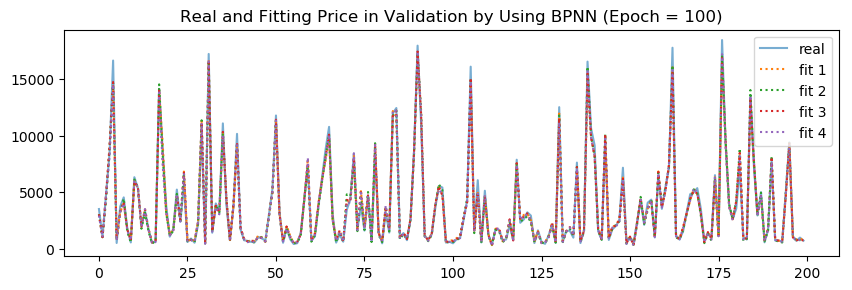

In [186]:
y1 = data_test3['price']
y2 = data_test3['price_pred_test_8_8']
y3 = data_test3['price_pred_test_10_5']
y4 = data_test3['price_pred_test_10_8']
y5 = data_test3['price_pred_test_10_10']

# 設定圖片大小為長15、寬10
plt.figure(figsize=(10,3),dpi=100,linewidth = 2)
plt.title('Real and Fitting Price in Validation by Using BPNN (Epoch = 100)') 
plt.plot(y1[0:200],'-', alpha = 0.6, label='real')
plt.plot(y2[0:200],':', label='fit 1')
plt.plot(y3[0:200],':', label='fit 2')
plt.plot(y4[0:200],':', label='fit 3')
plt.plot(y5[0:200],':', label='fit 4')
plt.legend(loc = 'upper right')
plt.show()

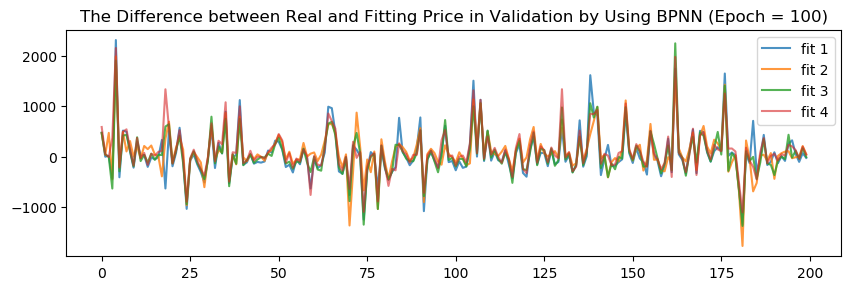

In [187]:
y2 = data_test3['price'] - data_test3['price_pred_test_8_8']
y3 = data_test3['price'] - data_test3['price_pred_test_10_5']
y4 = data_test3['price'] - data_test3['price_pred_test_10_8']
y5 = data_test3['price'] - data_test3['price_pred_test_10_10']

# 設定圖片大小為長15、寬10
plt.figure(figsize=(10,3),dpi=100,linewidth = 2)
plt.title('The Difference between Real and Fitting Price in Validation by Using BPNN (Epoch = 100)') 

plt.plot(y2[0:200],'-', alpha = 0.8, label='fit 1')
plt.plot(y3[0:200],'-', alpha = 0.8, label='fit 2')
plt.plot(y4[0:200],'-', alpha = 0.8, label='fit 3')
plt.plot(y5[0:200],'-', alpha = 0.6, label='fit 4')
plt.legend(loc = 'upper right')
plt.show()

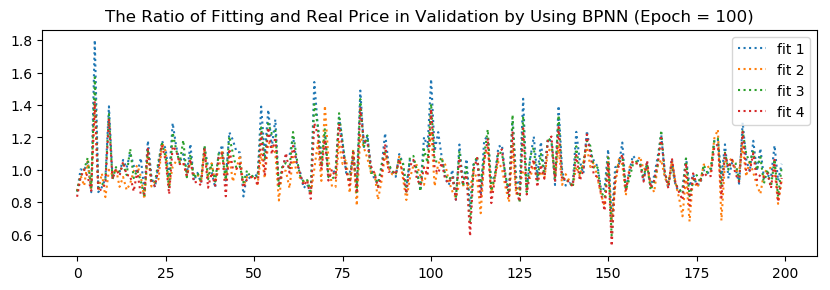

In [188]:
y2 = data_test3['price_pred_test_8_8'] / data_test3['price']
y3 = data_test3['price_pred_test_10_5'] / data_test3['price']
y4 = data_test3['price_pred_test_10_8'] / data_test3['price']
y5 = data_test3['price_pred_test_10_10'] / data_test3['price']

# 設定圖片大小為長15、寬10
plt.figure(figsize=(10,3),dpi=100,linewidth = 2)
plt.title('The Ratio of Fitting and Real Price in Validation by Using BPNN (Epoch = 100)') 

plt.plot(y2[0:200],':', label='fit 1')
plt.plot(y3[0:200],':', label='fit 2')
plt.plot(y4[0:200],':', label='fit 3')
plt.plot(y5[0:200],':', label='fit 4')
plt.legend(loc = 'upper right')
plt.show()